In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

In [4]:
train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')

In [5]:
train_cats_dir = os.path.join(train_dir, 'cats')  # directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')  # directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')  # directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  # directory with our validation dog pictures

In [6]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [7]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [8]:
batch_size = 32
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150


In [9]:
train_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
validation_image_generator = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(directory=train_dir,
                                                           batch_size=batch_size,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary',
                                                          )

Found 2000 images belonging to 2 classes.


In [11]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                             directory=validation_dir,
                                                             target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                             class_mode='binary')

Found 1000 images belonging to 2 classes.


In [12]:
sample_training_batch = next(iter(val_data_gen))

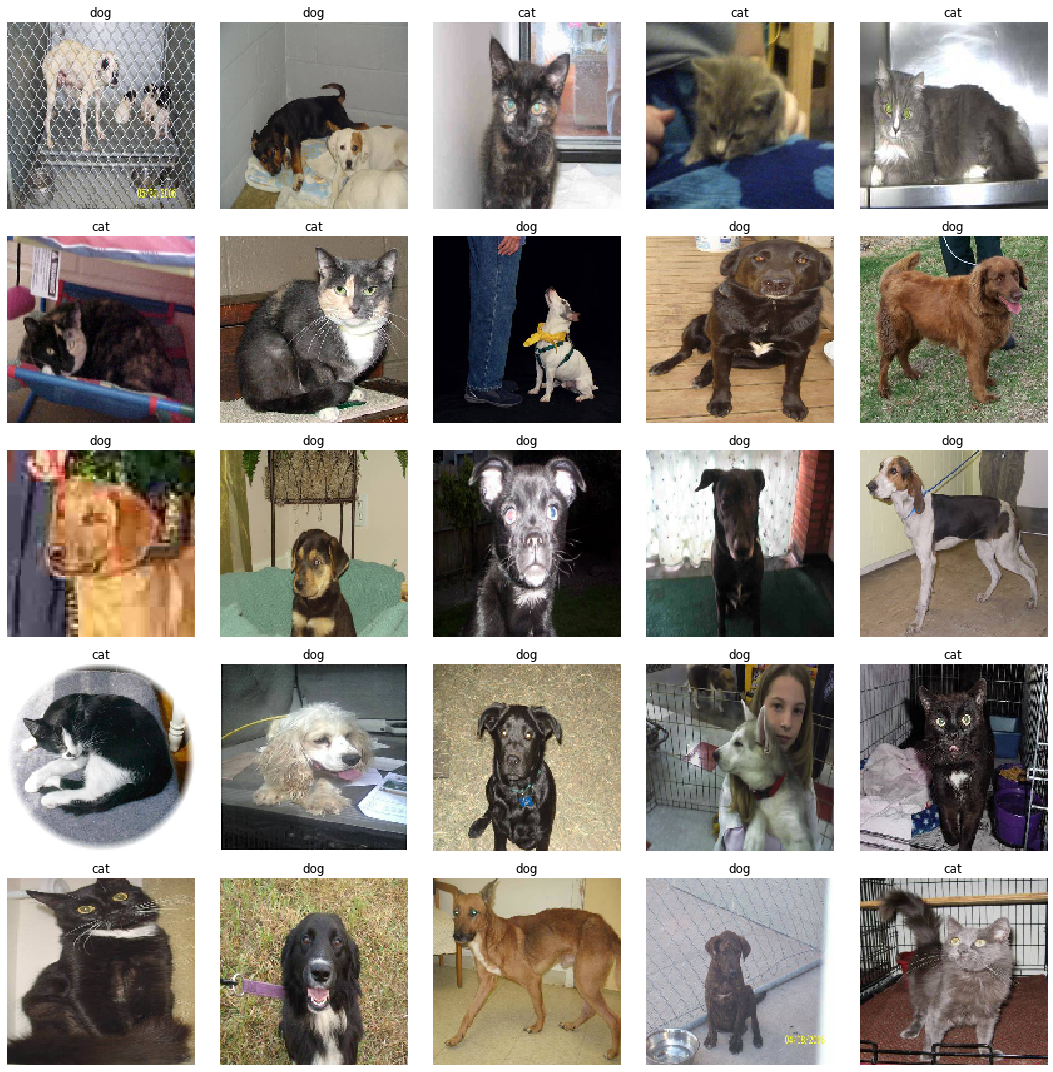

In [13]:
def plot_batch(batch, label_name):
    images,labels = batch
    if label_name is not None:
        labels = [label_name.get(l,l) for l in labels]
    fig, axes = plt.subplots(5,5,figsize=(15,15))
    for img, label, ax in zip(images, labels, axes.ravel()):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)
    
    plt.tight_layout()
    plt.show()
    
plot_batch(sample_training_batch, {0:'cat', 1:'dog'})
    

In [14]:
model = keras.models.Sequential([
    keras.layers.Conv2D(16, (3,3), 1, padding='same', activation=tf.nn.relu, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), 1, padding='same', activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1)
])


In [15]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy']
             )

In [16]:
history = model.fit(train_data_gen,
                  steps_per_epoch=total_train // batch_size,
                  epochs=epochs,
                  validation_data=val_data_gen,
                  validation_steps=total_val // batch_size,
                  )

Epoch 1/15
62/62 [==============================] - 7s 111ms/step - loss: 1.1477 - accuracy: 0.5156 - val_loss: 0.6639 - val_accuracy: 0.5961
Epoch 2/15
62/62 [==============================] - 7s 108ms/step - loss: 0.6224 - accuracy: 0.6280 - val_loss: 0.6344 - val_accuracy: 0.6725
Epoch 3/15
62/62 [==============================] - 7s 109ms/step - loss: 0.4789 - accuracy: 0.7566 - val_loss: 0.6163 - val_accuracy: 0.6446
Epoch 4/15
62/62 [==============================] - 7s 110ms/step - loss: 0.3532 - accuracy: 0.8445 - val_loss: 0.7230 - val_accuracy: 0.6539
Epoch 5/15
62/62 [==============================] - 7s 107ms/step - loss: 0.2222 - accuracy: 0.9029 - val_loss: 0.8006 - val_accuracy: 0.6725
Epoch 6/15
62/62 [==============================] - 7s 108ms/step - loss: 0.1241 - accuracy: 0.9558 - val_loss: 0.9783 - val_accuracy: 0.6746
Epoch 7/15
62/62 [==============================] - 7s 113ms/step - loss: 0.0734 - accuracy: 0.9797 - val_loss: 1.2190 - val_accuracy: 0.6663
Epoch 

## Implementing the dropout and image augmentation

In [70]:
image_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                         horizontal_flip=True, 
                                                        rotation_range=180,
                                                        shear_range=20,
                                                        zoom_range=.2, )

In [71]:
train_data_gen = image_gen.flow_from_directory(
                            batch_size=batch_size,
                          directory=train_dir,
                          shuffle=True,
                          target_size=(IMG_HEIGHT, IMG_WIDTH)
)

Found 2000 images belonging to 2 classes.


In [72]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]

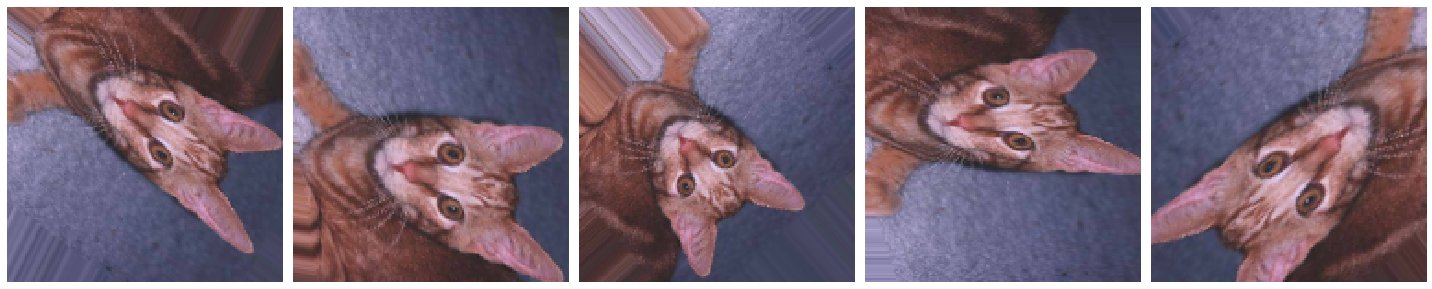

In [73]:

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(augmented_images)

In [177]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(16, 3, padding='same', activation='relu', 
#                         input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(),
    
#     keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(),
    
#     keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(),
    
#     keras.layers.Conv2D(128, 3, padding='same', activation='relu'),
#     keras.layers.BatchNormalization(),
#     keras.layers.MaxPool2D(),
    
# #     keras.layers.Conv2D(256, 3, padding='same', activation='relu'),
# #     keras.layers.BatchNormalization(),
# #     keras.layers.MaxPool2D(),
#     keras.layers.Flatten(),
# #     keras.layers.GlobalAveragePooling2D(),
#     keras.layers.Dense(1024),
#     keras.layers.Dense(1),
# ])

# model = keras.models.Sequential([
#     keras.layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
#     keras.layers.MaxPooling2D(),
#     keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
#     keras.layers.MaxPooling2D(),
#     keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
#     keras.layers.MaxPooling2D(),
#     keras.layers.Flatten(),
#     keras.layers.Dense(512, activation='relu'),
#     keras.layers.Dense(1)
# ])

base_model = keras.applications.resnet50.ResNet50(
    include_top=False
)
base_model.trainable = False

model = keras.models.Sequential([
#     keras.layers.Lambda(keras.applications.resnet50.preprocess_input,
#                        input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1)
])

In [178]:
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(optimizer=optimizer,
             loss=keras.losses.BinaryCrossentropy(from_logits=True),
             metrics=['accuracy'])

In [179]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d_18  (None, 2048)              0         
_________________________________________________________________
dense_62 (Dense)             (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 2,049
Non-trainable params: 23,587,712
_________________________________________________________________


In [180]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=3,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/3
62/62 [==============================] - 17s 280ms/step - loss: 0.7614 - accuracy: 0.5000 - val_loss: 0.7104 - val_accuracy: 0.5041
Epoch 2/3
62/62 [==============================] - 17s 266ms/step - loss: 0.6991 - accuracy: 0.5000 - val_loss: 0.6956 - val_accuracy: 0.5041
Epoch 3/3
62/62 [==============================] - 17s 268ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6941 - val_accuracy: 0.5000
